## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

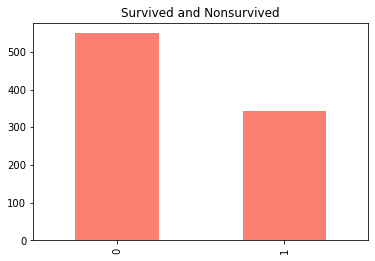

In [39]:
df['Survived'].value_counts().plot(kind='bar', color='salmon')
plt.title('Survived and Nonsurvived');

In [34]:
df_survived2 = pd.DataFrame(df['Survived'].value_counts())
df_survived2['Status'] = ['Dies','Alive']
df_survived2

,Survived,Status
0,549,Dies
1,342,Alive


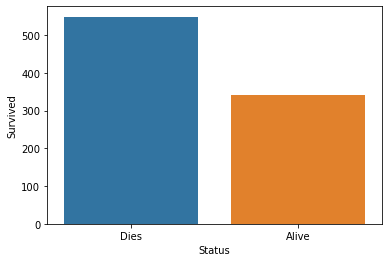

In [38]:
sns.barplot(x='Status', y='Survived', data=df_survived2);

In [18]:
# Pclass

In [20]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

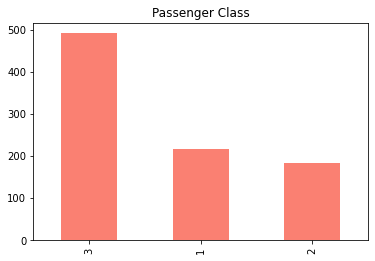

In [40]:
df['Pclass'].value_counts().plot(kind='bar', color='salmon')
plt.title('Passenger Class');

In [13]:
# Alone

In [14]:
df['Alone'] = df['SibSp'] + df['Parch']

In [15]:
df['Alone'][df['Alone']>0] = 'With Family'
df['Alone'][df['Alone']==0] = 'Without Family'

In [16]:
df['Alone'].value_counts()

Without Family    537
With Family       354
Name: Alone, dtype: int64

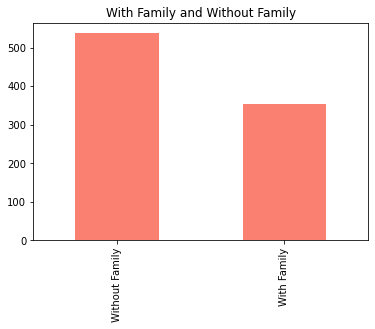

In [41]:
df['Alone'].value_counts().plot(kind='bar', color='salmon')
plt.title('With Family and Without Family');

In [ ]:
# Embarked

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

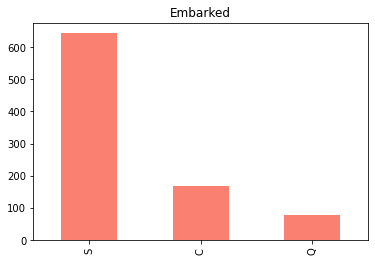

In [42]:
df['Embarked'].value_counts().plot(kind='bar', color='salmon')
plt.title('Embarked');

In [8]:
# Correlation

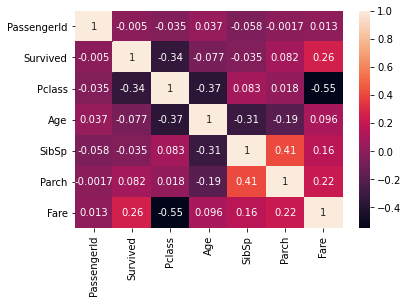

In [9]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True);

Column `Pclass` dan `Fare` multicolinearitas

**Task**

In [23]:
df2 = pd.read_csv('data_telco.csv')
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df2['gender'].value_counts()

Male      3041
Female    2993
Name: gender, dtype: int64

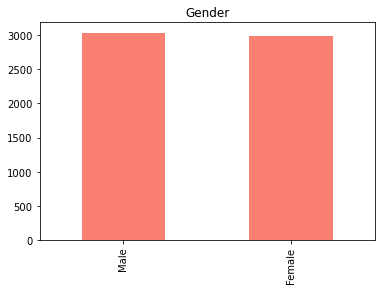

In [43]:
# Column gender

df2['gender'].value_counts().plot(kind='bar', color='salmon')
plt.title('Gender');

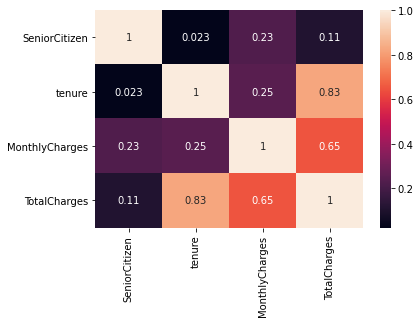

In [28]:
# Correlation

plt.figure(figsize = (6,4))
sns.heatmap(df2.corr(), annot=True);

Contoh column yang multicolinearitas:
- Column `tenure` dan `MonthlyCharges` dengan nilai korelasi 0.83
- Column `tenure` dan `TotalCharges`  dengan nilai korelasi 0.65